In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline


In [2]:
df = pd.read_csv(r'C:\Users\mocha\OneDrive\Documents\SPH5104 MIMICIII DATA\refined_data1.csv')
df.head()

,Unnamed: 0,icustay_id,los,discharge_location,discharge_location_simplified,ethnicity,ethnicity_simplified,hospital_expire_flag,age,gender,sofa,apsiii,oasis,mingcs,elixhauser_vanwalraven,vaso_treatment
0,0,200019,3.0594,DEAD/EXPIRED,Palliation/Death,WHITE,Caucasian,1,83,F,5,49,38,7.0,0.0,0
1,1,200075,2.0708,HOME HEALTH CARE,Fit for discharge,WHITE,Caucasian,0,84,F,8,49,36,14.0,15.0,0
2,2,200099,2.0236,SNF,Specialised care required,WHITE,Caucasian,0,80,M,7,46,18,14.0,3.0,0
3,3,200106,3.9103,HOME HEALTH CARE,Fit for discharge,WHITE,Caucasian,0,81,F,2,47,31,14.0,0.0,0
4,4,200179,4.2150,SNF,Specialised care required,WHITE,Caucasian,0,86,M,4,43,37,14.0,0.0,0


In [3]:
# shape and data types of the data
print(df.shape)
print(df.dtypes)

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(4919, 16)
Unnamed: 0                         int64
icustay_id                         int64
los                              float64
discharge_location                object
discharge_location_simplified     object
ethnicity                         object
ethnicity_simplified              object
hospital_expire_flag               int64
age                                int64
gender                            object
sofa                               int64
apsiii                             int64
oasis                              int64
mingcs                           float64
elixhauser_vanwalraven           float64
vaso_treatment                     int64
dtype: object
['Unnamed: 0' 'icustay_id' 'los' 'hospital_expire_flag' 'age' 'sofa'
 'apsiii' 'oasis' 'mingcs' 'elixhauser_vanwalraven' 'vaso_treatment']
['discharge_location' 'discharge_location_simplified' 'ethnicity'
 'ethnicity_simplified' 'gender']


<AxesSubplot:>

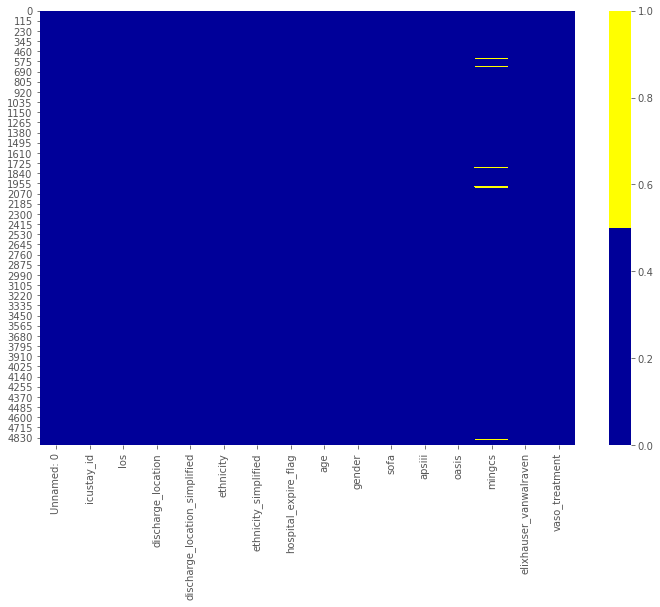

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
cols = df.columns[:32] # first 32 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [5]:
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
icustay_id - 0%
los - 0%
discharge_location - 0%
discharge_location_simplified - 0%
ethnicity - 0%
ethnicity_simplified - 0%
hospital_expire_flag - 0%
age - 0%
gender - 0%
sofa - 0%
apsiii - 0%
oasis - 0%
mingcs - 1%
elixhauser_vanwalraven - 0%
vaso_treatment - 0%


created missing indicator for: mingcs
created missing indicator for: elixhauser_vanwalraven


<AxesSubplot:xlabel='index'>

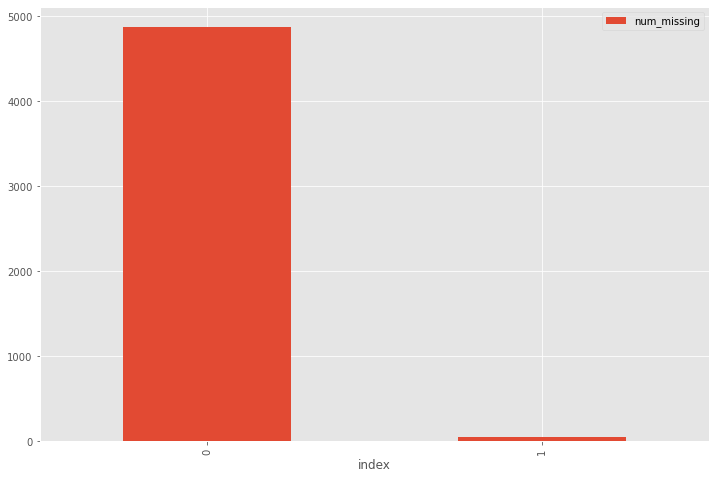

In [6]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [7]:
# drop rows with a lot of missing values.
ind_missing = df[df['num_missing'] < 55000].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

In [8]:
# impute the missing values and create the missing value indicator variables for each numeric column.
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing values for: mingcs
imputing missing values for: elixhauser_vanwalraven


In [9]:
# impute the missing values and create the missing value indicator variables for each non-numeric column.
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

In [10]:
df['age'].value_counts()

300    1020
81      519
83      514
80      483
84      467
82      462
85      398
86      362
87      292
88      249
89      153
Name: age, dtype: int64

In [11]:
df['age'].replace([300], [91.4], inplace=True)

In [12]:
df['age'].value_counts()

91.4    1020
81.0     519
83.0     514
80.0     483
84.0     467
82.0     462
85.0     398
86.0     362
87.0     292
88.0     249
89.0     153
Name: age, dtype: int64

<AxesSubplot:>

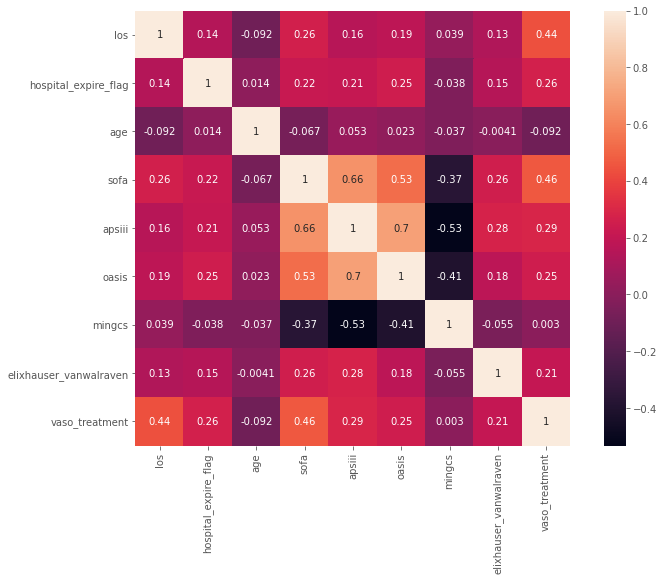

In [13]:
cols = ['los', 'hospital_expire_flag', 'age', 'sofa', 'apsiii', 'oasis', 'mingcs', 'elixhauser_vanwalraven', 'vaso_treatment']

sns.heatmap(df[cols].corr(), annot = True,square=True)


count    4919.000000
mean        7.404444
std         8.843694
min         2.000000
25%         2.843400
50%         4.115600
75%         7.859350
max       100.122500
Name: los, dtype: float64

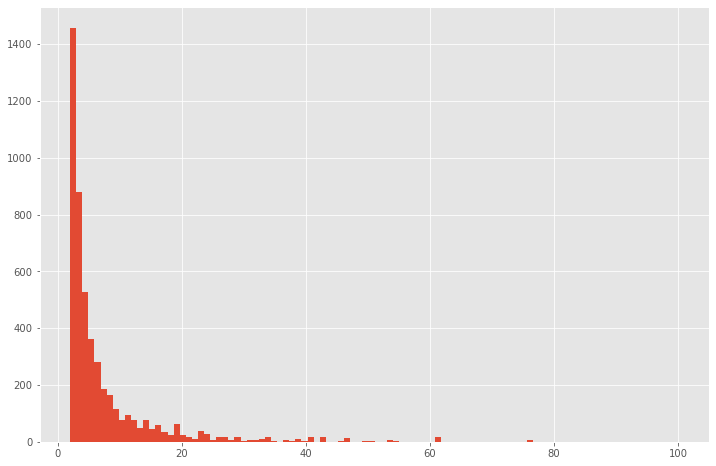

In [14]:
# histogram of numeric columns imputed with median.
df['los'].hist(bins=100)

#descriptive stats
df['los'].describe()

<AxesSubplot:>

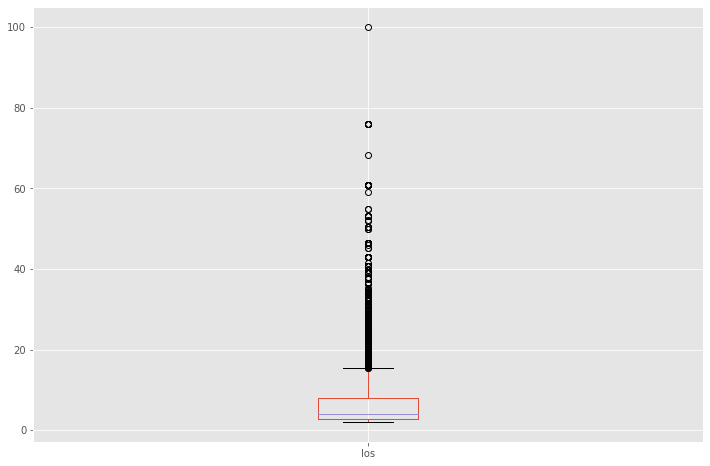

In [15]:
# box plot.
df.boxplot(column=['los'])

count    4919.000000
mean        5.341533
std         3.388262
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        18.000000
Name: sofa, dtype: float64

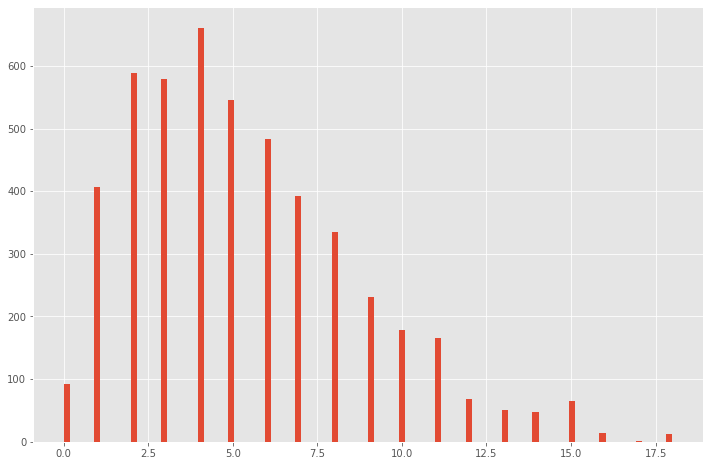

In [16]:
# histogram of numeric columns imputed with median.
df['sofa'].hist(bins=100)

#descriptive stats
df['sofa'].describe()

<AxesSubplot:>

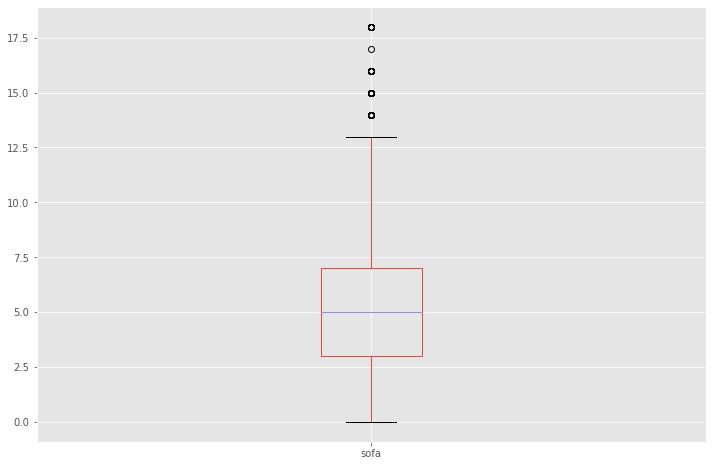

In [17]:
# box plot.
df.boxplot(column=['sofa'])

count    4919.000000
mean       49.878024
std        22.789392
min         0.000000
25%        35.000000
50%        46.000000
75%        61.000000
max       161.000000
Name: apsiii, dtype: float64

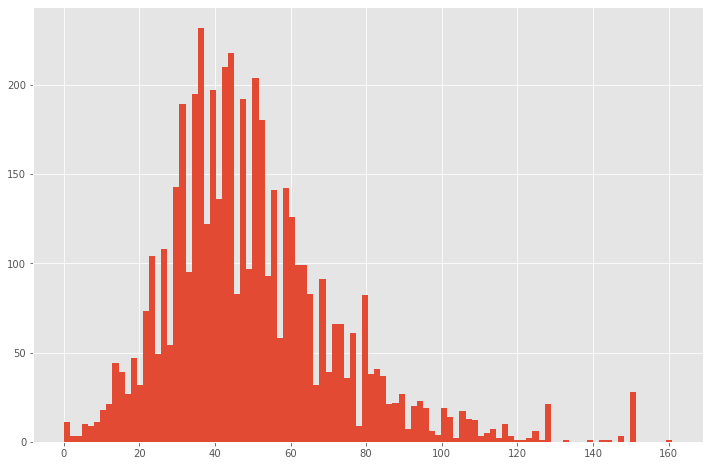

In [18]:
# histogram of numeric columns imputed with median.
df['apsiii'].hist(bins=100)


#descriptive stats
df['apsiii'].describe()

<AxesSubplot:>

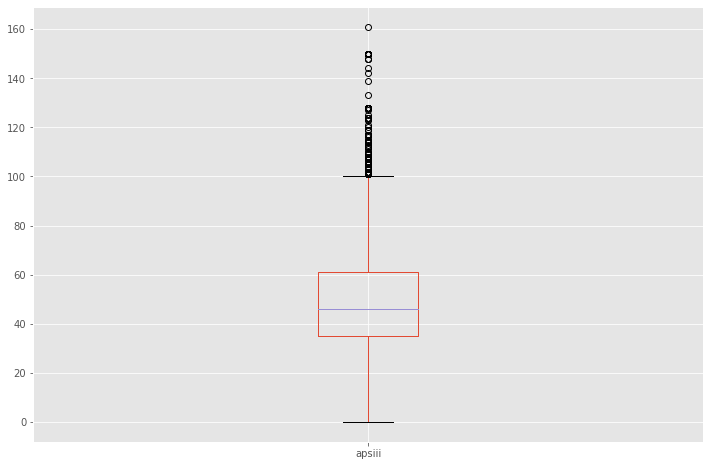

In [19]:
# box plot.
df.boxplot(column=['apsiii'])

count    4919.000000
mean       29.431795
std         8.743194
min         3.000000
25%        23.000000
50%        29.000000
75%        35.000000
max        58.000000
Name: oasis, dtype: float64

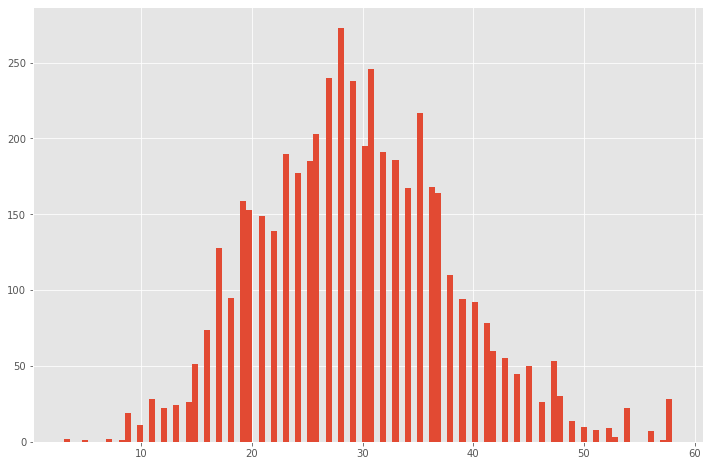

In [20]:
# histogram of numeric columns imputed with median.
df['oasis'].hist(bins=100)


#descriptive stats
df['oasis'].describe()

<AxesSubplot:>

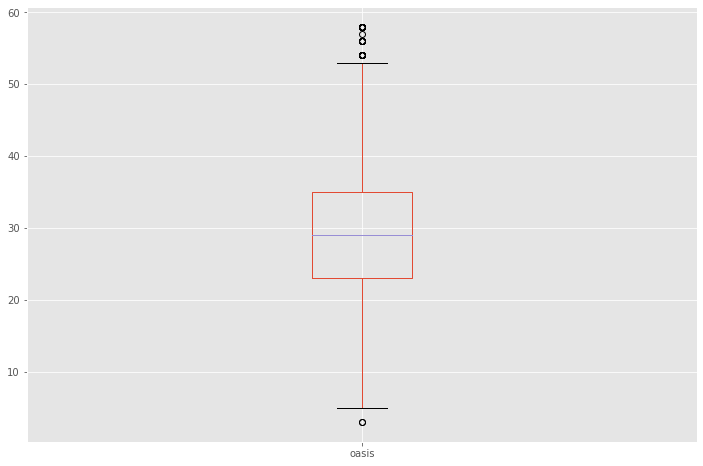

In [21]:
# box plot.
df.boxplot(column=['oasis'])

count    4919.000000
mean       13.290506
std         3.061982
min         3.000000
25%        13.000000
50%        15.000000
75%        15.000000
max        15.000000
Name: mingcs, dtype: float64

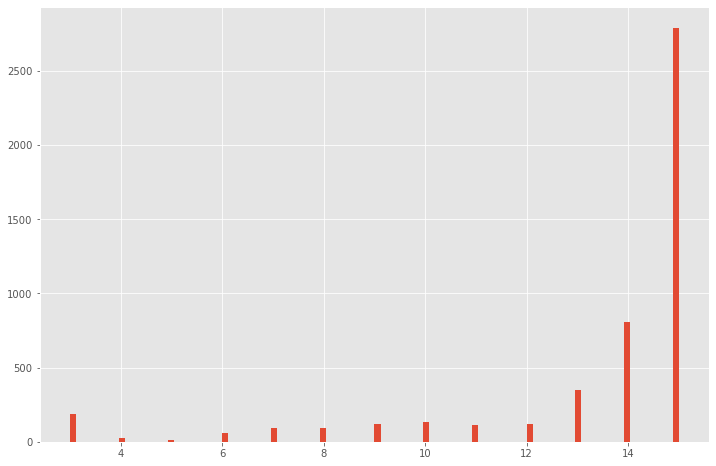

In [22]:
# histogram of numeric columns imputed with median.
df['mingcs'].hist(bins=100)


#descriptive stats
df['mingcs'].describe()

<AxesSubplot:>

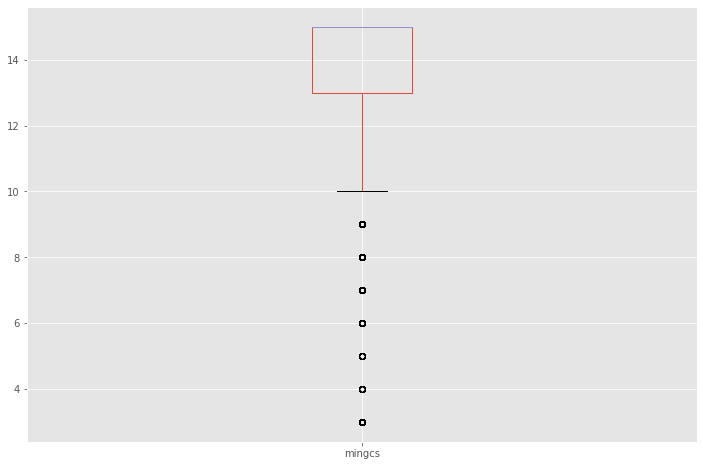

In [23]:
# box plot.
df.boxplot(column=['mingcs'])

count    4919.000000
mean        9.831267
std         7.709154
min        -8.000000
25%         5.000000
50%         9.000000
75%        14.000000
max        53.000000
Name: elixhauser_vanwalraven, dtype: float64

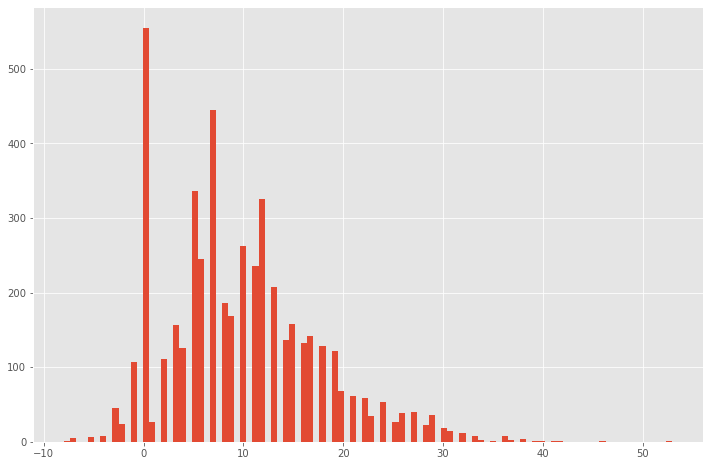

In [24]:
# histogram of numeric columns imputed with median.
df['elixhauser_vanwalraven'].hist(bins=100)


#descriptive stats
df['elixhauser_vanwalraven'].describe()

<AxesSubplot:>

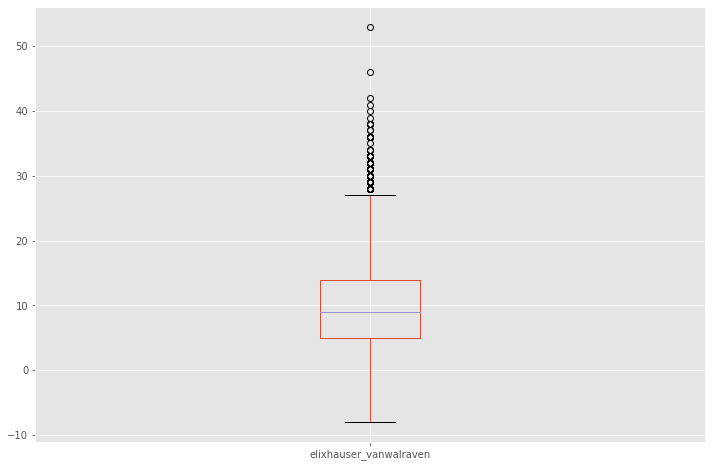

In [25]:
# box plot.
df.boxplot(column=['elixhauser_vanwalraven'])

<AxesSubplot:xlabel='sofa', ylabel='Density'>

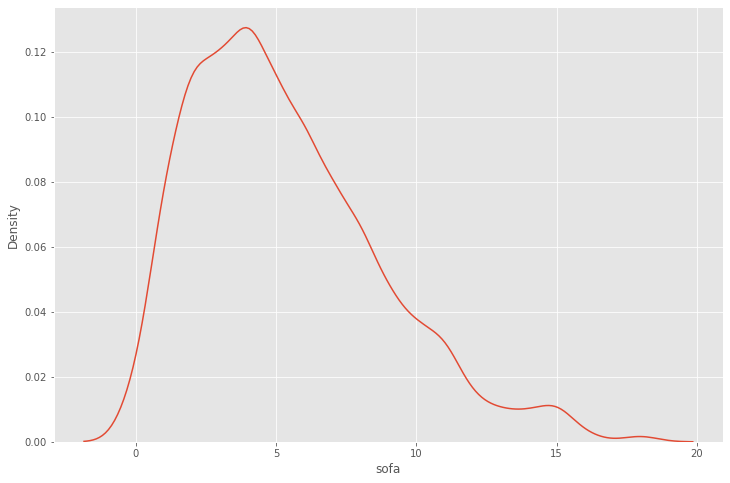

In [29]:
import seaborn as sns
sns.kdeplot(df['sofa'])

<AxesSubplot:xlabel='apsiii', ylabel='Density'>

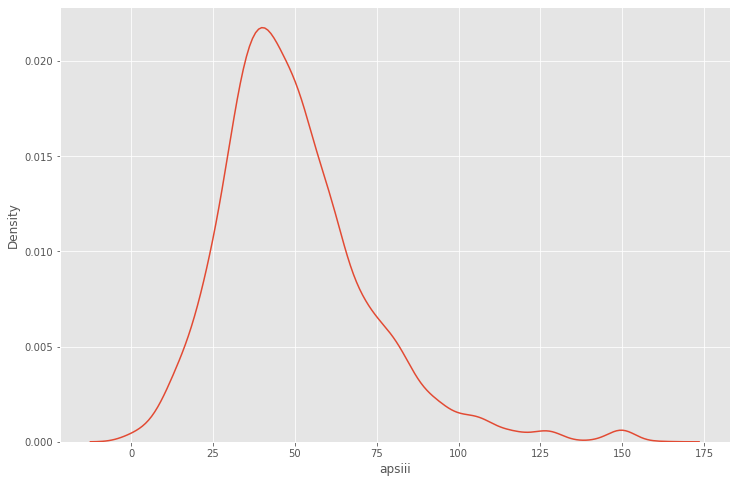

In [32]:
sns.kdeplot(df['apsiii'])

<AxesSubplot:xlabel='oasis', ylabel='Density'>

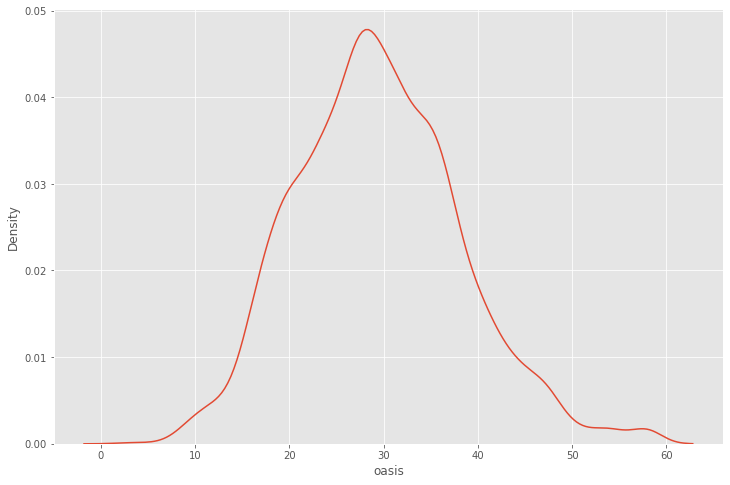

In [31]:
sns.kdeplot(df['oasis'])

<AxesSubplot:xlabel='sofa', ylabel='Density'>

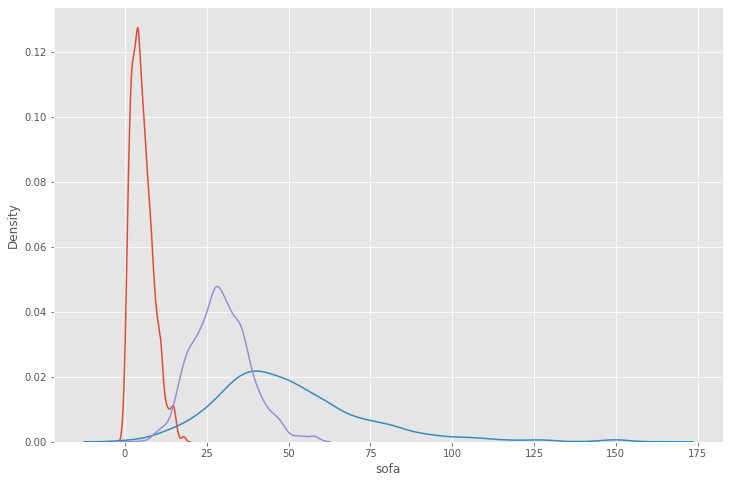

In [33]:
sns.kdeplot(df['sofa'])
sns.kdeplot(df['apsiii'])
sns.kdeplot(df['oasis'])

<AxesSubplot:xlabel='mingcs', ylabel='Density'>

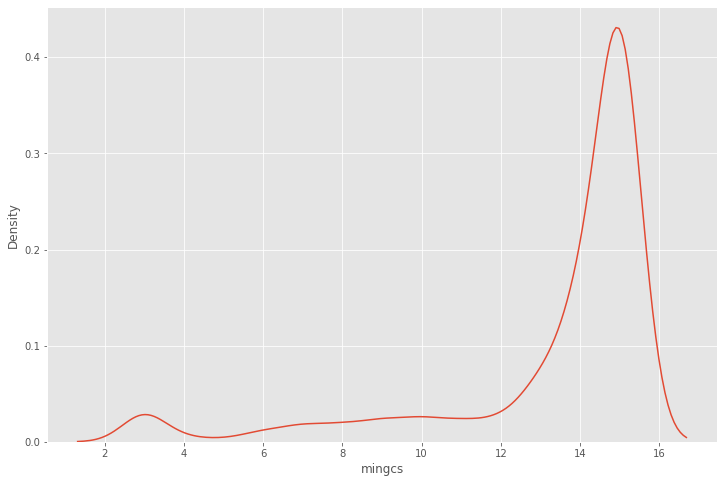

In [34]:
sns.kdeplot(df['mingcs'])

<AxesSubplot:xlabel='elixhauser_vanwalraven', ylabel='Density'>

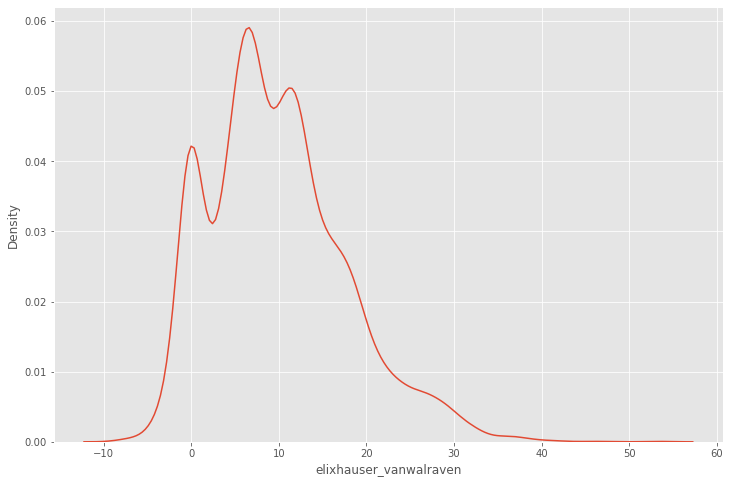

In [35]:
sns.kdeplot(df['elixhauser_vanwalraven'])

<AxesSubplot:xlabel='mingcs', ylabel='Density'>

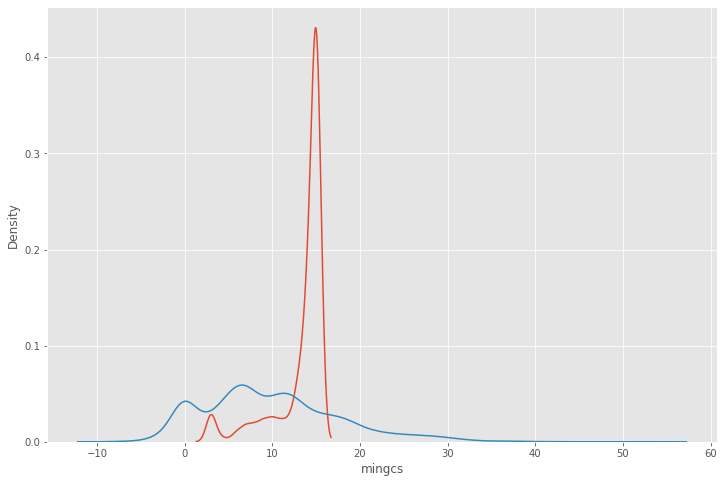

In [36]:
sns.kdeplot(df['mingcs'])
sns.kdeplot(df['elixhauser_vanwalraven'])

In [37]:
#features with high duplicate %
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

mingcs_ismissing: 98.96320%
False    4868
True       51
Name: mingcs_ismissing, dtype: int64

elixhauser_vanwalraven_ismissing: 99.97967%
False    4918
True        1
Name: elixhauser_vanwalraven_ismissing, dtype: int64

num_missing: 98.94287%
0    4867
1      52
Name: num_missing, dtype: int64



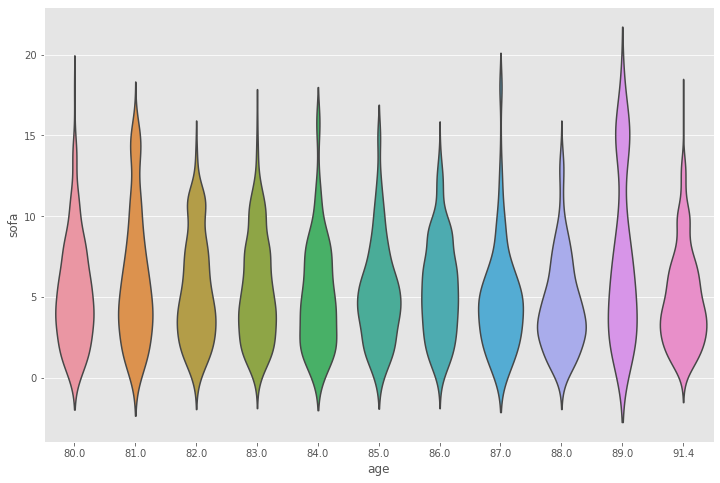

In [38]:
data = df.dropna(subset=['age', 'sofa'])
sns.violinplot(x='age', y='sofa', data=data, inner=None)
plt.show()

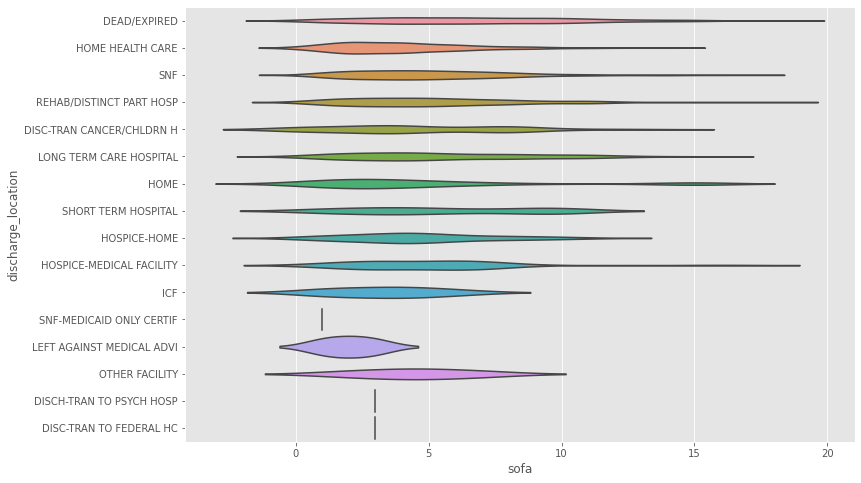

In [39]:
data = df.dropna(subset=['sofa', 'discharge_location'])
sns.violinplot(x='sofa', y='discharge_location', data=data, inner=None)
plt.show()

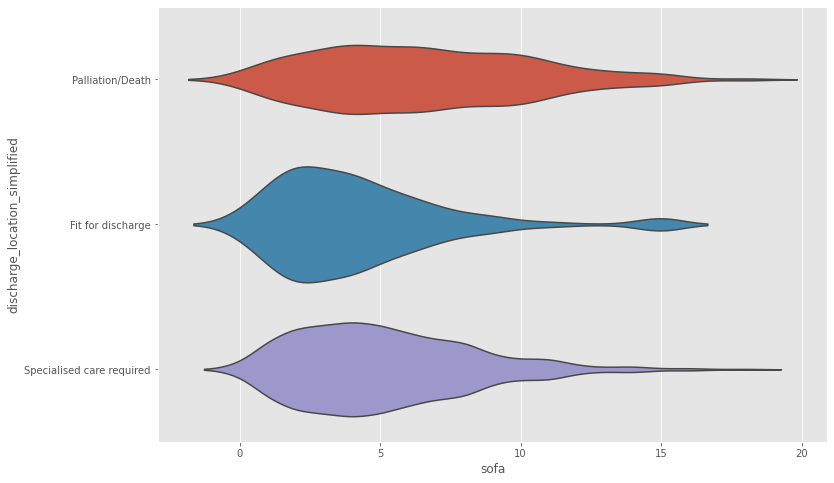

In [40]:
data = df.dropna(subset=['sofa', 'discharge_location_simplified'])
sns.violinplot(x='sofa', y='discharge_location_simplified', data=data, inner=None)
plt.show()

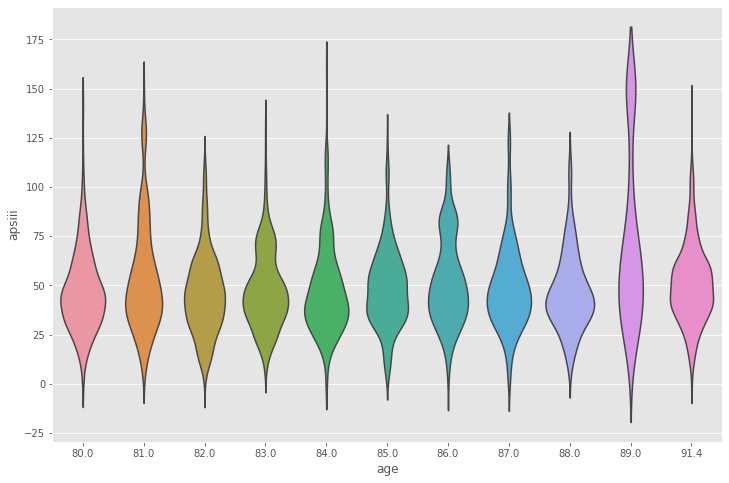

In [41]:
data = df.dropna(subset=['age', 'apsiii'])
sns.violinplot(x='age', y='apsiii', data=data, inner=None)
plt.show()

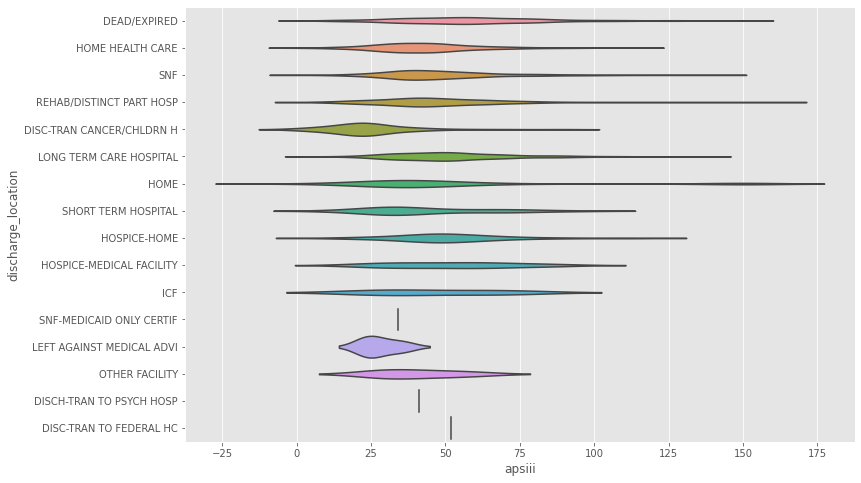

In [42]:
data = df.dropna(subset=['apsiii', 'discharge_location'])
sns.violinplot(x='apsiii', y='discharge_location', data=data, inner=None)
plt.show()

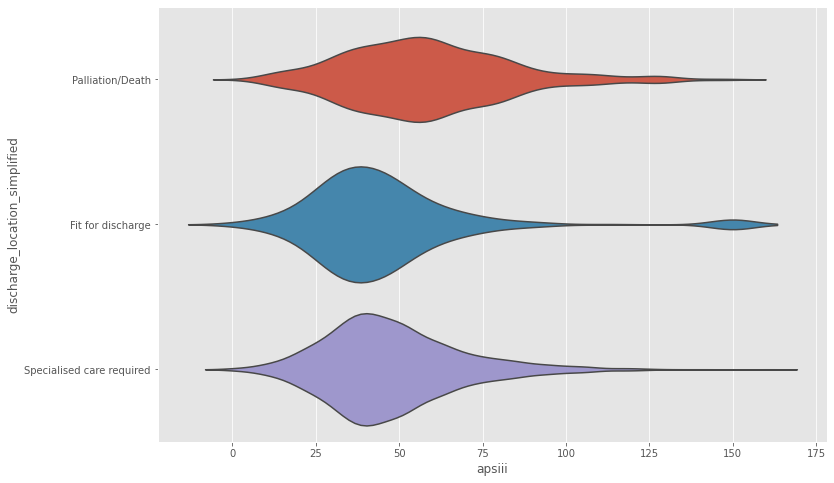

In [43]:
data = df.dropna(subset=['apsiii', 'discharge_location_simplified'])
sns.violinplot(x='apsiii', y='discharge_location_simplified', data=data, inner=None)
plt.show()

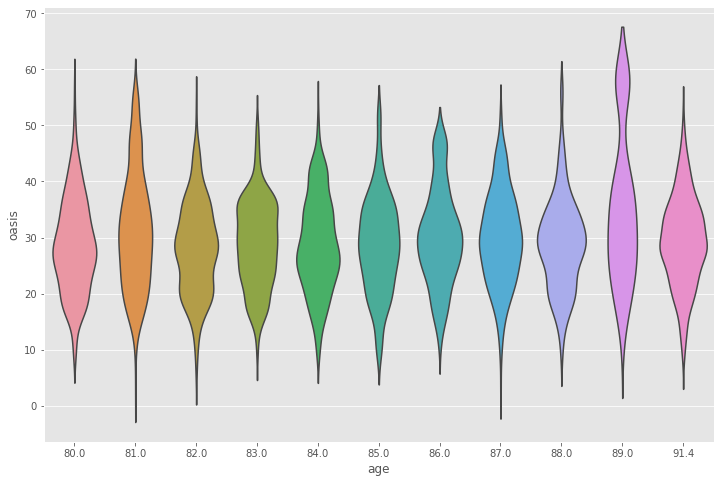

In [44]:
data = df.dropna(subset=['age', 'oasis'])
sns.violinplot(x='age', y='oasis', data=data, inner=None)
plt.show()

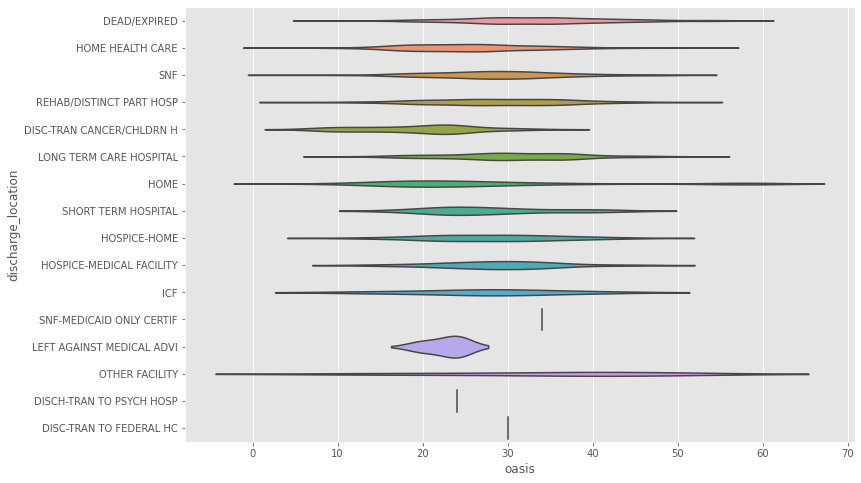

In [45]:
data = df.dropna(subset=['oasis', 'discharge_location'])
sns.violinplot(x='oasis', y='discharge_location', data=data, inner=None)
plt.show()

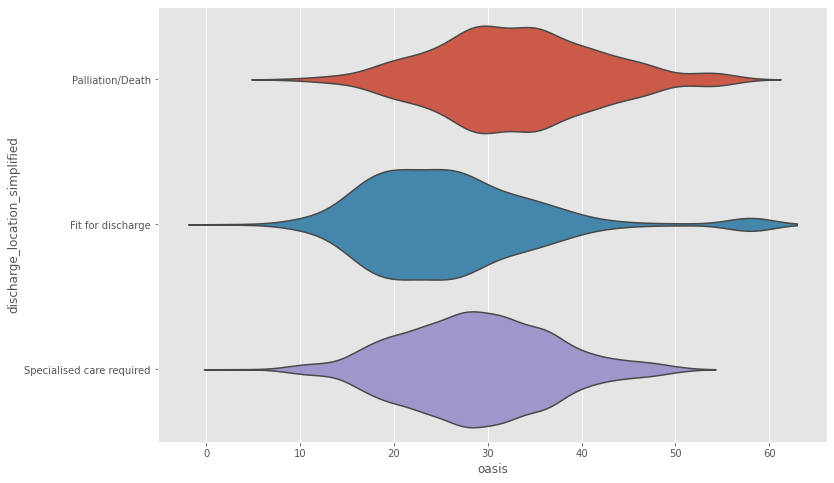

In [46]:
data = df.dropna(subset=['oasis', 'discharge_location_simplified'])
sns.violinplot(x='oasis', y='discharge_location_simplified', data=data, inner=None)
plt.show()

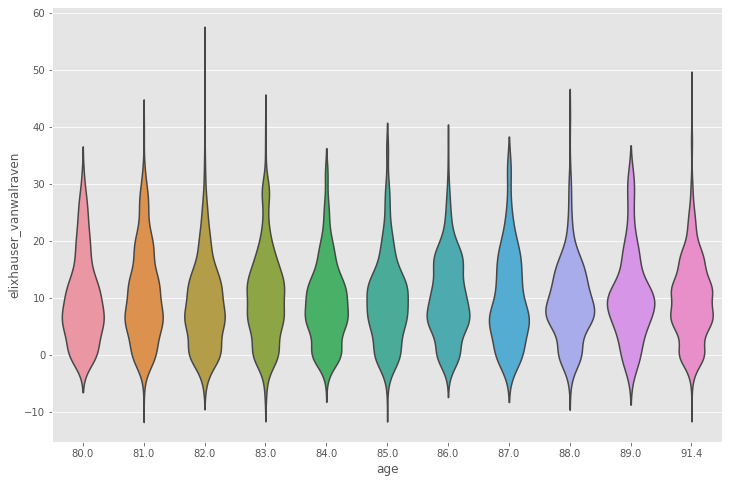

In [47]:
data = df.dropna(subset=['age', 'elixhauser_vanwalraven'])
sns.violinplot(x='age', y='elixhauser_vanwalraven', data=data, inner=None)
plt.show()

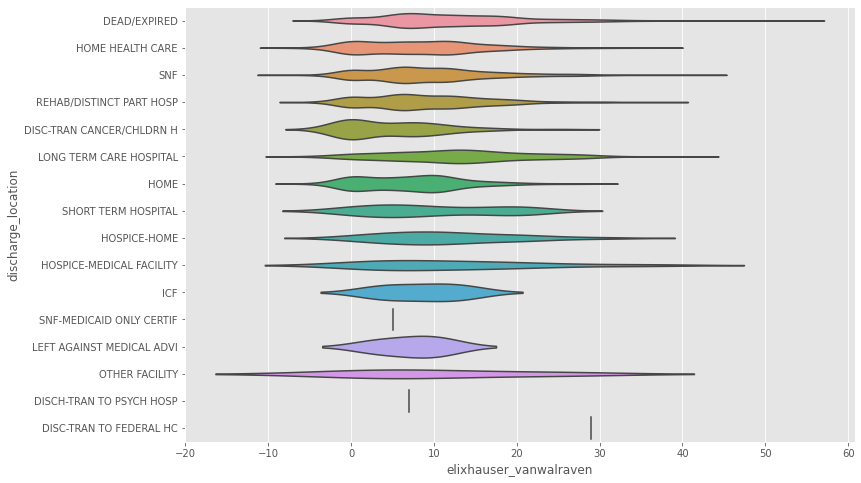

In [48]:
data = df.dropna(subset=['elixhauser_vanwalraven', 'discharge_location'])
sns.violinplot(x='elixhauser_vanwalraven', y='discharge_location', data=data, inner=None)
plt.show()

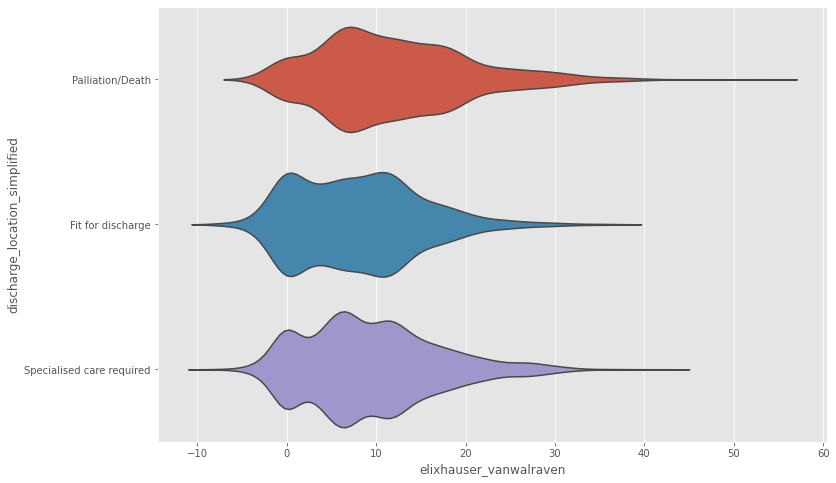

In [49]:
data = df.dropna(subset=['elixhauser_vanwalraven', 'discharge_location_simplified'])
sns.violinplot(x='elixhauser_vanwalraven', y='discharge_location_simplified', data=data, inner=None)
plt.show()

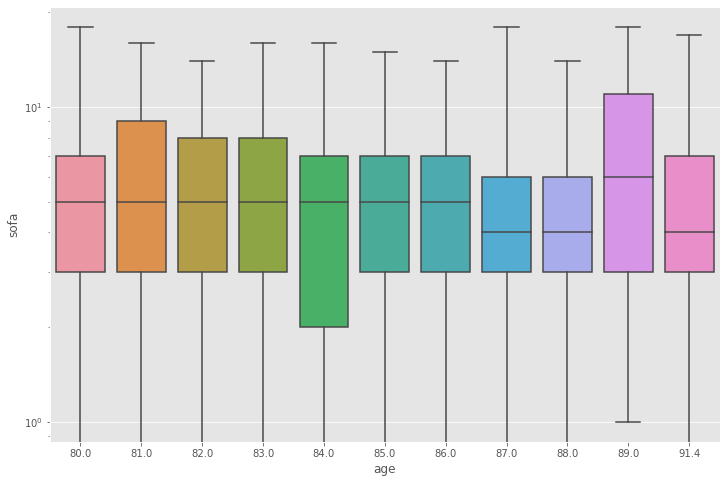

In [50]:
sns.boxplot(x='age', y='sofa', data=data, whis=10)
plt.yscale('log')
plt.show()

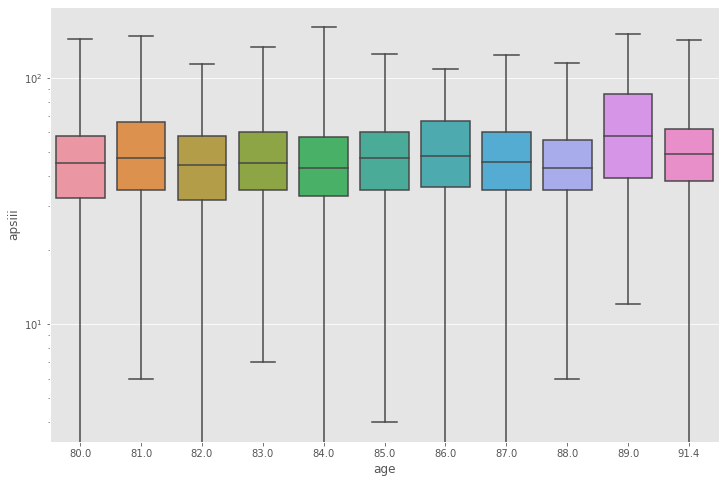

In [51]:
sns.boxplot(x='age', y='apsiii', data=data, whis=10)
plt.yscale('log')
plt.show()

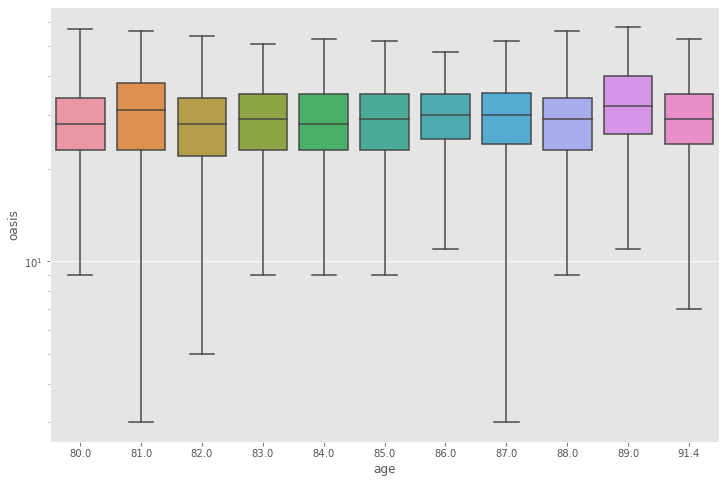

In [52]:
sns.boxplot(x='age', y='oasis', data=data, whis=10)
plt.yscale('log')
plt.show()

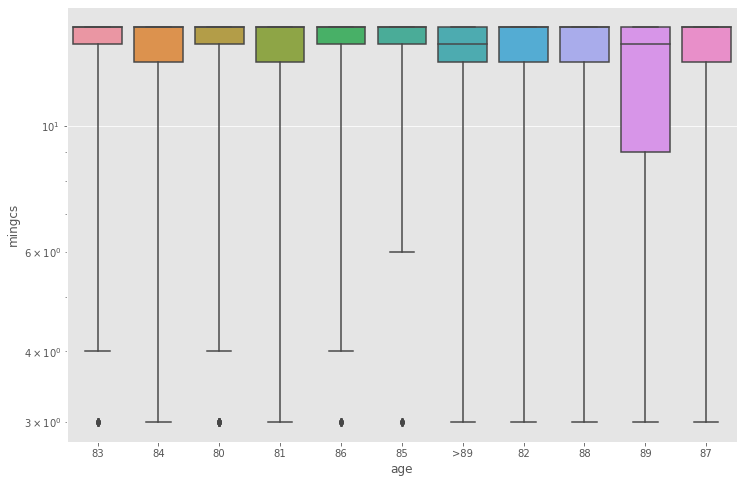

In [109]:
sns.boxplot(x='age', y='mingcs', data=data, whis=10)
plt.yscale('log')
plt.show()

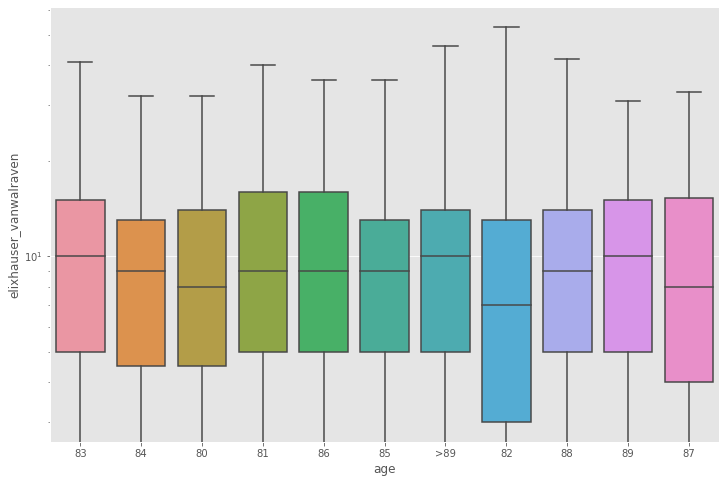

In [110]:
sns.boxplot(x='age', y='elixhauser_vanwalraven', data=data, whis=10)
plt.yscale('log')
plt.show()

In [67]:
columns = ['los', 'age', 'hospital_expire_flag', 'sofa', 'apsiii', 'oasis', 'mingcs', 'elixhauser_vanwalraven', 'vaso_treatment']
subset = df[columns]

subset.corr()

,los,age,hospital_expire_flag,sofa,apsiii,oasis,mingcs,elixhauser_vanwalraven,vaso_treatment
los,1.000000,-0.091544,0.144847,0.263129,0.161879,0.185487,0.039356,0.134995,0.439604
age,-0.091544,1.000000,0.013512,-0.067222,0.053047,0.023149,-0.036564,-0.004082,-0.091503
hospital_expire_flag,0.144847,0.013512,1.000000,0.216586,0.211571,0.247844,-0.038264,0.151033,0.264849
sofa,0.263129,-0.067222,0.216586,1.000000,0.658285,0.533053,-0.365815,0.255310,0.462673
apsiii,0.161879,0.053047,0.211571,0.658285,1.000000,0.702117,-0.532271,0.279598,0.291513
oasis,0.185487,0.023149,0.247844,0.533053,0.702117,1.000000,-0.406054,0.175055,0.246726
mingcs,0.039356,-0.036564,-0.038264,-0.365815,-0.532271,-0.406054,1.000000,-0.054534,0.002974
elixhauser_vanwalraven,0.134995,-0.004082,0.151033,0.255310,0.279598,0.175055,-0.054534,1.000000,0.205042
vaso_treatment,0.439604,-0.091503,0.264849,0.462673,0.291513,0.246726,0.002974,0.205042,1.000000


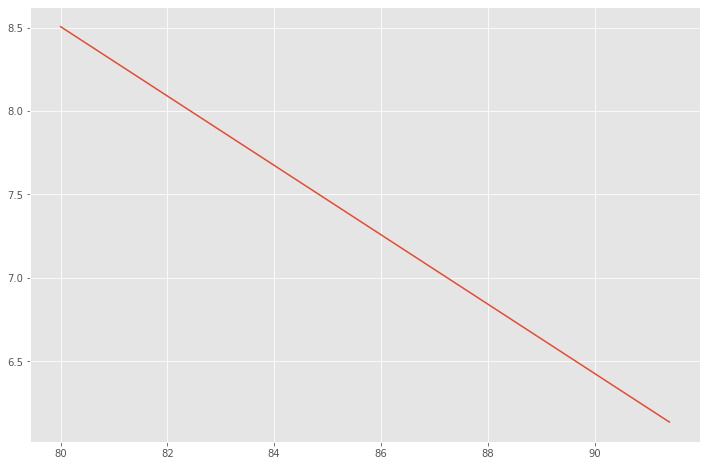

In [64]:
from scipy.stats import linregress

subset = df.dropna(subset=['age', 'los'])

xs = subset['age']
ys = subset['los']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

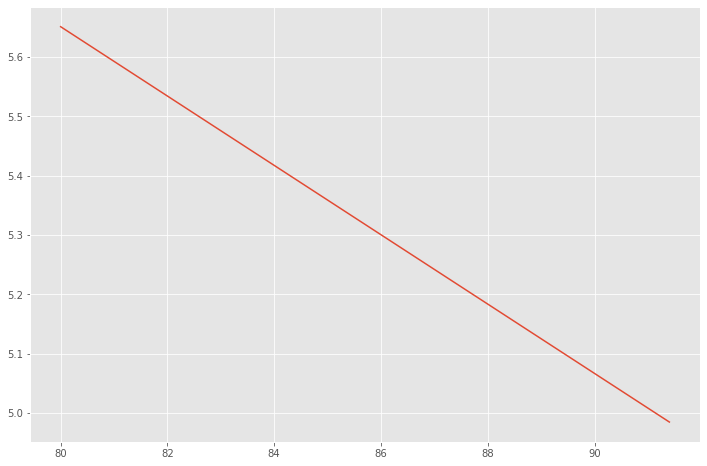

In [54]:
from scipy.stats import linregress

subset = df.dropna(subset=['age', 'sofa'])

xs = subset['age']
ys = subset['sofa']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

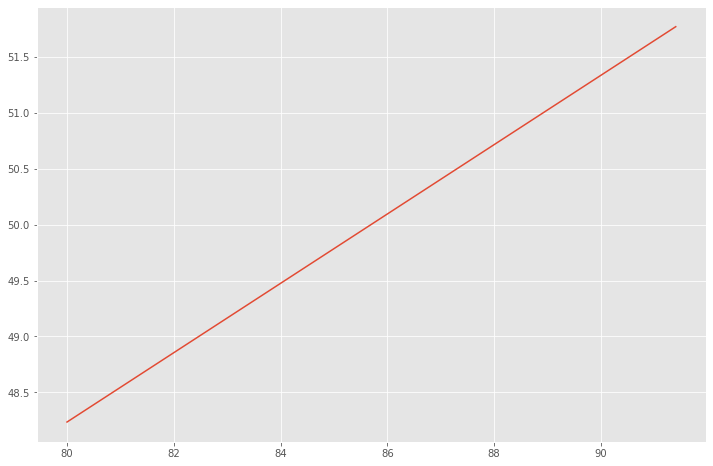

In [56]:
from scipy.stats import linregress

subset = df.dropna(subset=['age', 'apsiii'])

xs = subset['age']
ys = subset['apsiii']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

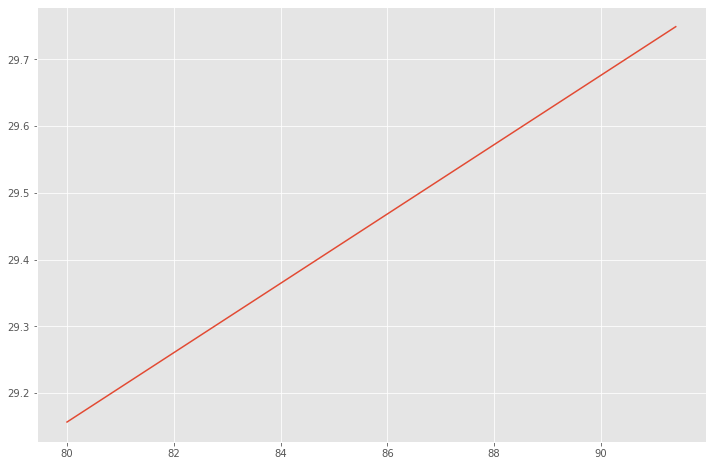

In [57]:
subset = df.dropna(subset=['age', 'oasis'])

xs = subset['age']
ys = subset['oasis']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

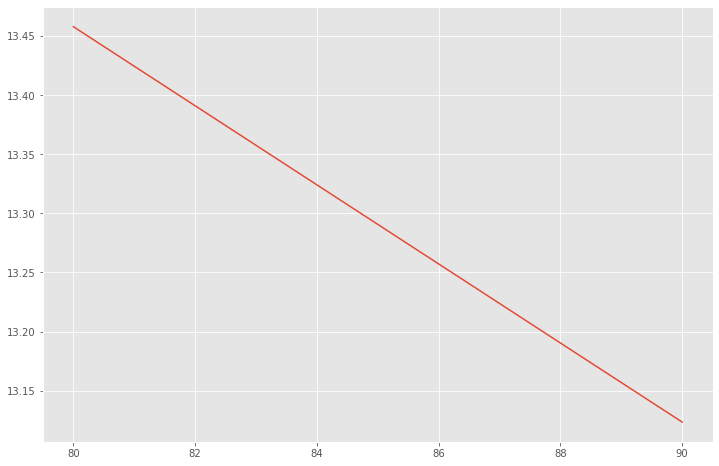

In [142]:
subset = df.dropna(subset=['age', 'mingcs'])

xs = subset['age']
ys = subset['mingcs']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

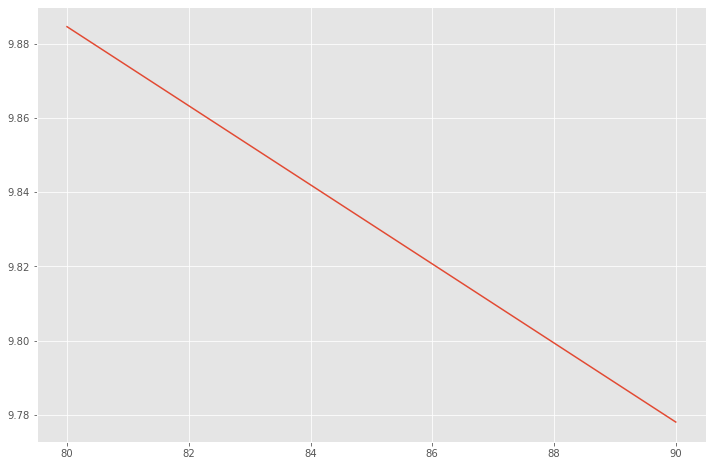

In [143]:
subset = df.dropna(subset=['age', 'elixhauser_vanwalraven'])

xs = subset['age']
ys = subset['elixhauser_vanwalraven']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

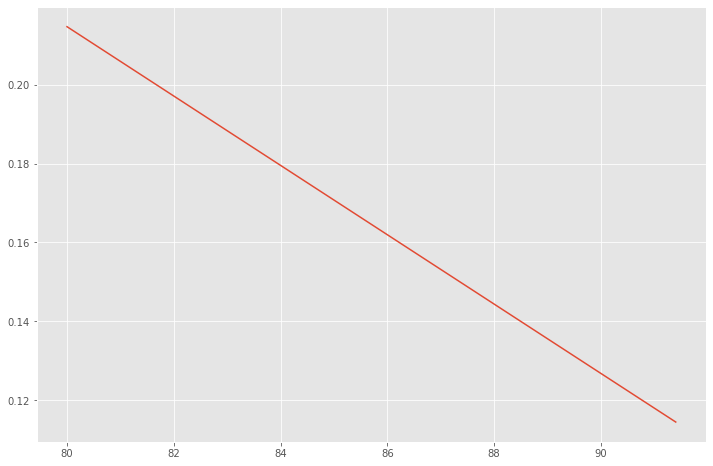

In [66]:
subset = df.dropna(subset=['age', 'vaso_treatment'])

xs = subset['age']
ys = subset['vaso_treatment']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

In [27]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = df['discharge_location_simplified']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

df['death_location_simplified'] = integer_encoded
interger_encoded = onehot_encoded

['Palliation/Death' 'Fit for discharge' 'Specialised care required' ...
 'Specialised care required' 'Specialised care required'
 'Specialised care required']
[1 0 2 ... 2 2 2]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [26]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = df['ethnicity_simplified']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

df['ethnicity_simplified'] = integer_encoded
interger_encoded = onehot_encoded

['Caucasian' 'Caucasian' 'Caucasian' ... 'OTHER' 'Caucasian' 'Caucasian']
[2 2 2 ... 3 2 2]
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [29]:
df.to_csv(r'C:\Users\mocha\OneDrive\Documents\SPH5104 MIMICIII DATA\refined_data_encoded.csv')

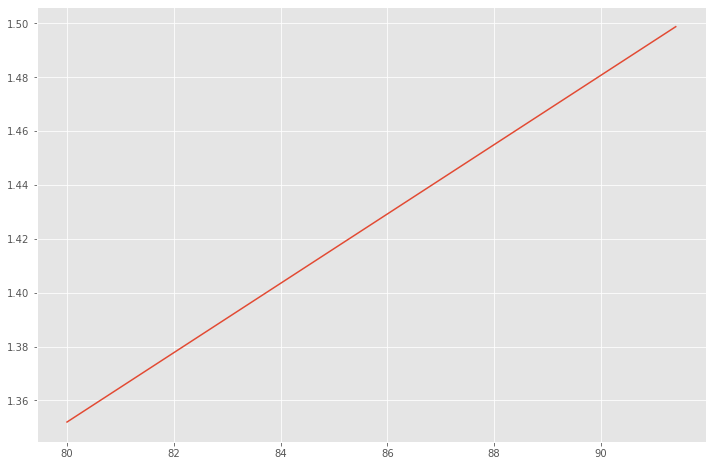

In [76]:
subset = df.dropna(subset=['age', 'death_location_simplified'])

xs = subset['age']
ys = subset['death_location_simplified']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

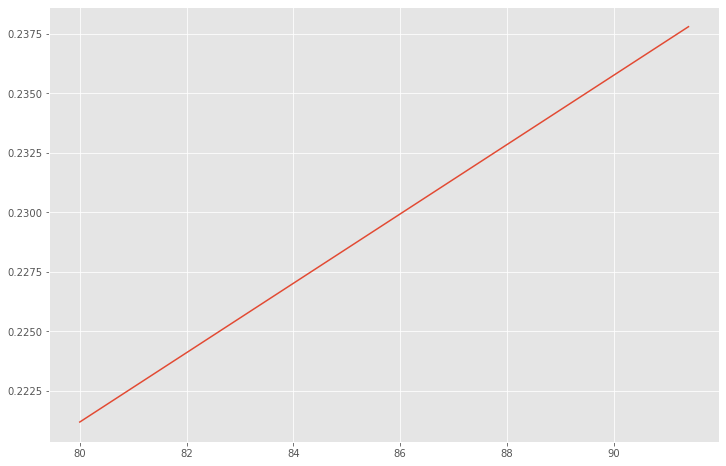

In [84]:
subset = df.dropna(subset=['age', 'hospital_expire_flag'])

xs = subset['age']
ys = subset['hospital_expire_flag']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

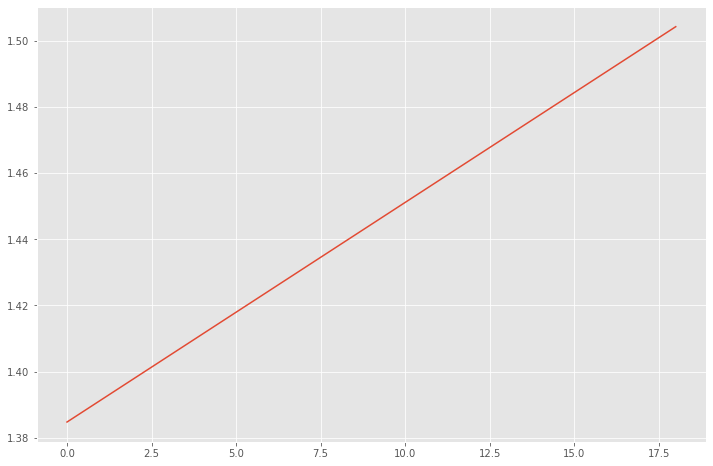

In [79]:
subset = df.dropna(subset=['sofa', 'death_location_simplified'])

xs = subset['sofa']
ys = subset['death_location_simplified']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

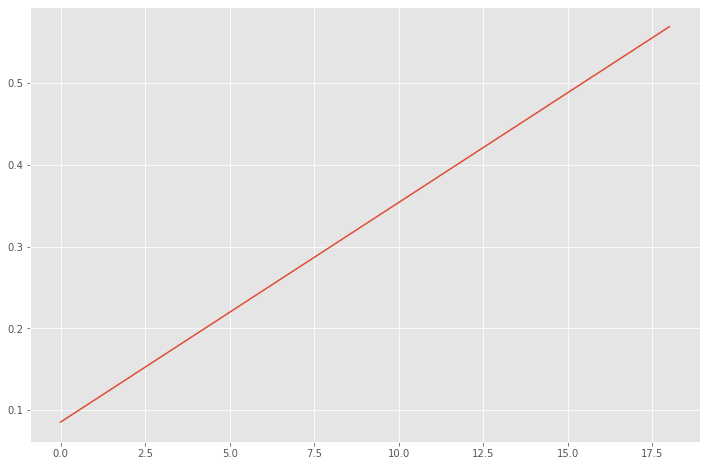

In [85]:
subset = df.dropna(subset=['sofa', 'hospital_expire_flag'])

xs = subset['sofa']
ys = subset['hospital_expire_flag']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

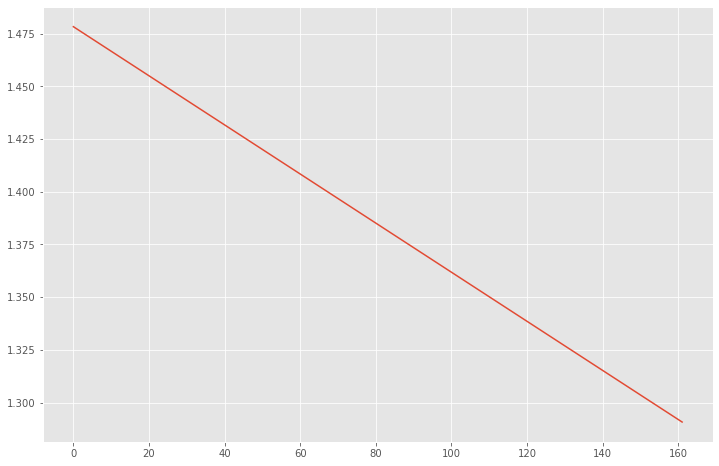

In [80]:
subset = df.dropna(subset=['apsiii', 'death_location_simplified'])

xs = subset['apsiii']
ys = subset['death_location_simplified']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

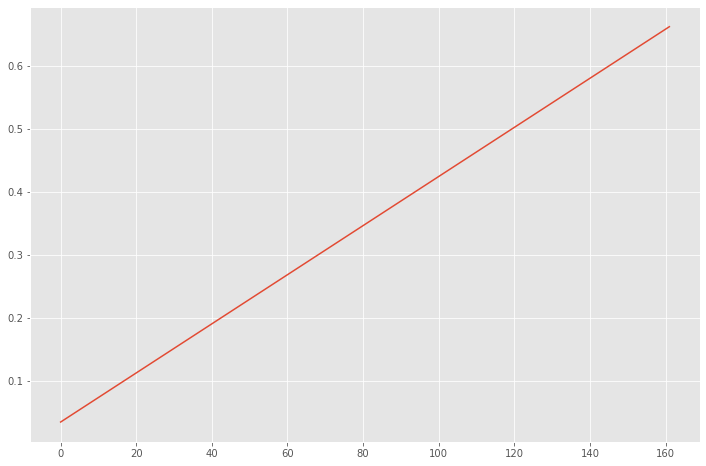

In [86]:
subset = df.dropna(subset=['apsiii', 'hospital_expire_flag'])

xs = subset['apsiii']
ys = subset['hospital_expire_flag']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

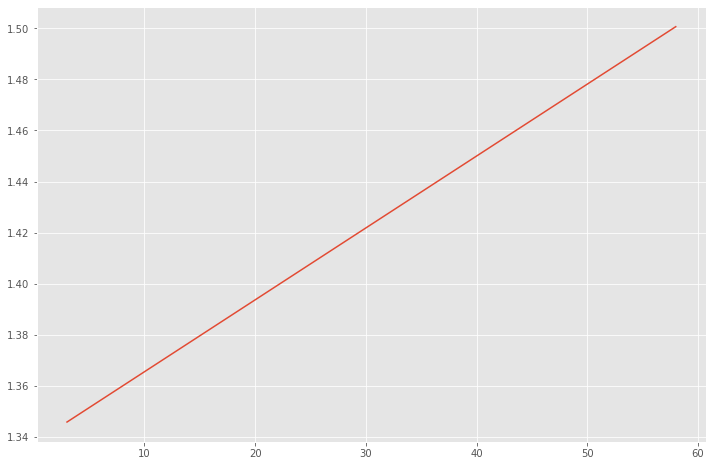

In [81]:
subset = df.dropna(subset=['oasis', 'death_location_simplified'])

xs = subset['oasis']
ys = subset['death_location_simplified']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

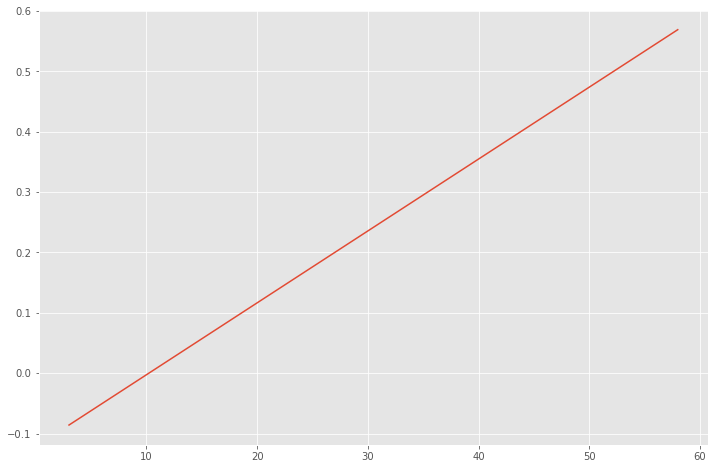

In [87]:
subset = df.dropna(subset=['oasis', 'hospital_expire_flag'])

xs = subset['oasis']
ys = subset['hospital_expire_flag']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

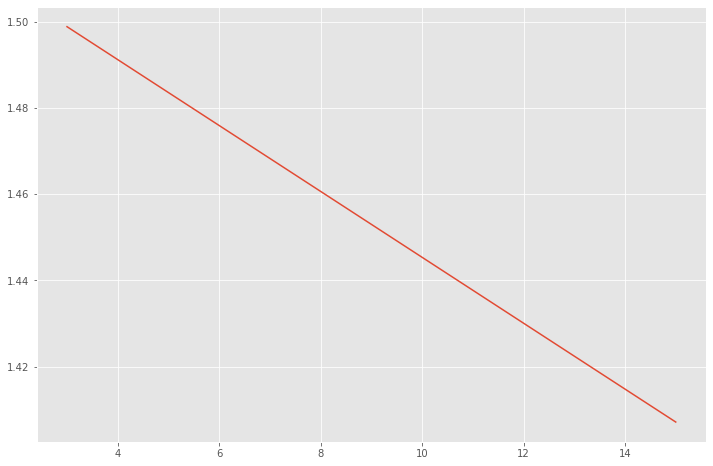

In [82]:
subset = df.dropna(subset=['mingcs', 'death_location_simplified'])

xs = subset['mingcs']
ys = subset['death_location_simplified']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

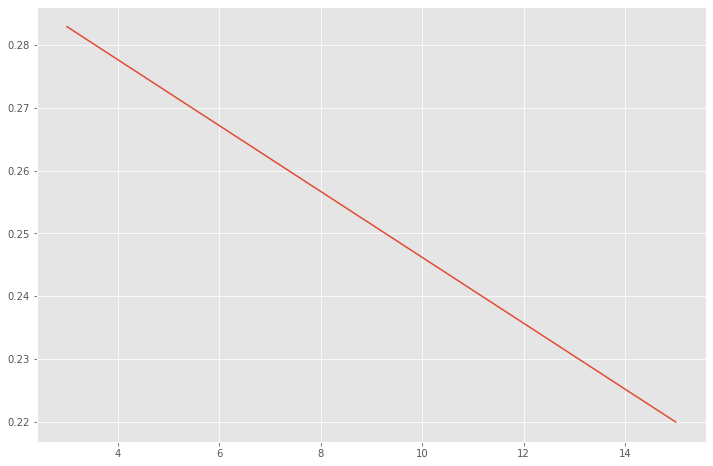

In [88]:
subset = df.dropna(subset=['mingcs', 'hospital_expire_flag'])

xs = subset['mingcs']
ys = subset['hospital_expire_flag']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

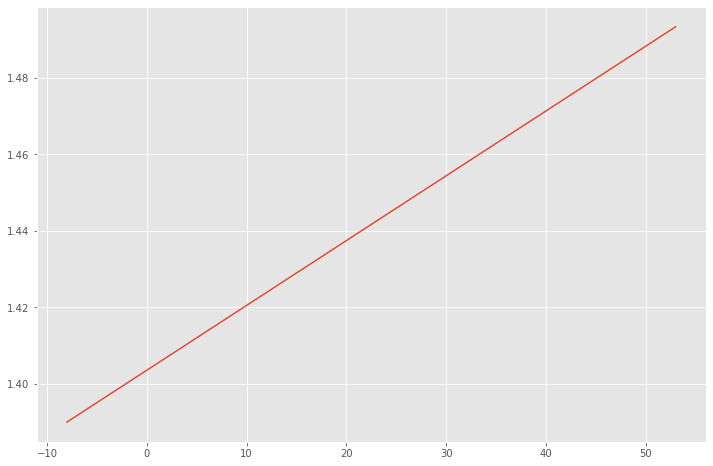

In [83]:
subset = df.dropna(subset=['elixhauser_vanwalraven', 'death_location_simplified'])

xs = subset['elixhauser_vanwalraven']
ys = subset['death_location_simplified']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

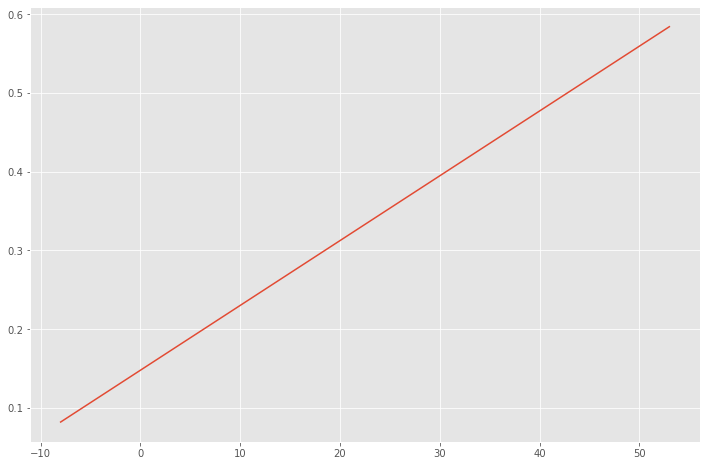

In [89]:
subset = df.dropna(subset=['elixhauser_vanwalraven', 'hospital_expire_flag'])

xs = subset['elixhauser_vanwalraven']
ys = subset['hospital_expire_flag']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

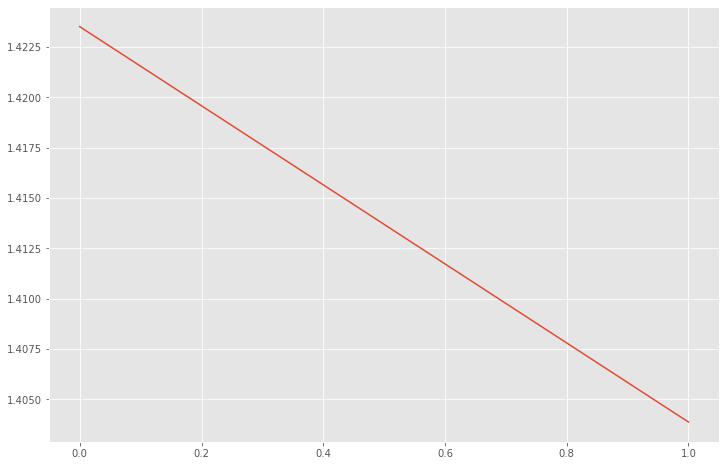

In [90]:
subset = df.dropna(subset=['vaso_treatment', 'death_location_simplified'])

xs = subset['vaso_treatment']
ys = subset['death_location_simplified']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

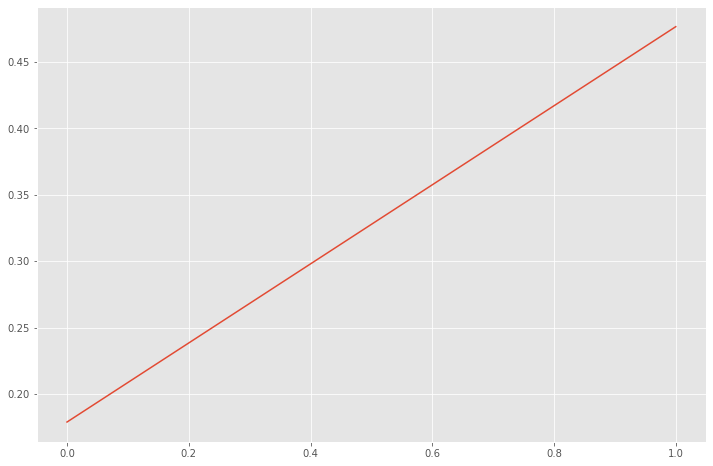

In [91]:
subset = df.dropna(subset=['vaso_treatment', 'hospital_expire_flag'])

xs = subset['vaso_treatment']
ys = subset['hospital_expire_flag']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

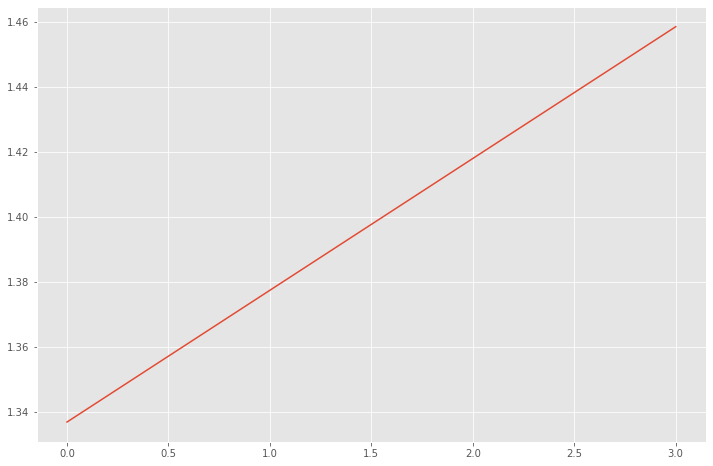

In [119]:
subset = df.dropna(subset=['ethnicity_simplified', 'death_location_simplified'])

xs = subset['ethnicity_simplified']
ys = subset['death_location_simplified']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

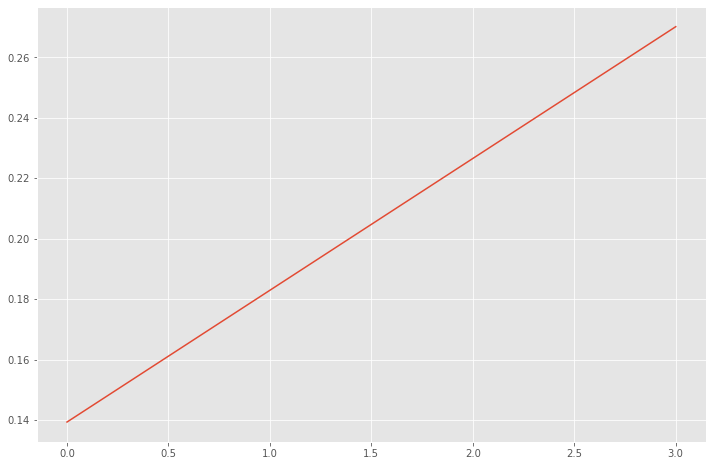

In [120]:
subset = df.dropna(subset=['ethnicity_simplified', 'hospital_expire_flag'])

xs = subset['ethnicity_simplified']
ys = subset['hospital_expire_flag']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

In [92]:
import statsmodels.formula.api as smf

results = smf.ols('death_location_simplified ~ sofa', data=df).fit()
results.params

Intercept    1.384725
sofa         0.006643
dtype: float64

In [93]:
import statsmodels.formula.api as smf

results = smf.ols('hospital_expire_flag ~ sofa', data=df).fit()
results.params

Intercept    0.085443
sofa         0.026858
dtype: float64

In [94]:
import statsmodels.formula.api as smf

results = smf.ols('death_location_simplified ~ sofa + age', data=df).fit()
results.params

Intercept    0.242657
sofa         0.007673
age          0.013325
dtype: float64

In [95]:
import statsmodels.formula.api as smf

results = smf.ols('hospital_expire_flag ~ sofa + age', data=df).fit()
results.params

Intercept   -0.175260
sofa         0.027094
age          0.003042
dtype: float64

In [96]:
import statsmodels.formula.api as smf

results = smf.ols('death_location_simplified ~ apsiii', data=df).fit()
results.params

Intercept    1.478300
apsiii      -0.001165
dtype: float64

In [97]:
import statsmodels.formula.api as smf

results = smf.ols('hospital_expire_flag ~ apsiii', data=df).fit()
results.params

Intercept    0.034345
apsiii       0.003901
dtype: float64

In [98]:
import statsmodels.formula.api as smf

results = smf.ols('death_location_simplified ~ apsiii + age', data=df).fit()
results.params

Intercept    0.351985
apsiii      -0.001285
age          0.013275
dtype: float64

In [99]:
import statsmodels.formula.api as smf

results = smf.ols('hospital_expire_flag ~ apsiii + age', data=df).fit()
results.params

Intercept    0.013337
apsiii       0.003899
age          0.000248
dtype: float64

In [100]:
results = smf.ols('death_location_simplified ~ oasis', data=df).fit()
results.params

Intercept    1.337342
oasis        0.002815
dtype: float64

In [101]:
results = smf.ols('hospital_expire_flag ~ oasis', data=df).fit()
results.params

Intercept   -0.121644
oasis        0.011911
dtype: float64

In [102]:
results = smf.ols('death_location_simplified ~ oasis + age', data=df).fit()
results.params

Intercept    0.254803
oasis        0.002684
age          0.012737
dtype: float64

In [103]:
results = smf.ols('hospital_expire_flag ~ oasis + age', data=df).fit()
results.params

Intercept   -0.192961
oasis        0.011902
age          0.000839
dtype: float64

In [106]:
results = smf.ols('death_location_simplified ~ mingcs', data=df).fit()
results.params

Intercept    1.521804
mingcs      -0.007644
dtype: float64

In [104]:
results = smf.ols('death_location_simplified ~ mingcs + age', data=df).fit()
results.params

Intercept    0.432963
mingcs      -0.007055
age          0.012673
dtype: float64

In [107]:
results = smf.ols('hospital_expire_flag ~ mingcs', data=df).fit()
results.params

Intercept    0.298693
mingcs      -0.005251
dtype: float64

In [105]:
results = smf.ols('hospital_expire_flag ~ mingcs + age', data=df).fit()
results.params

Intercept    0.186287
mingcs      -0.005190
age          0.001308
dtype: float64

In [108]:
results = smf.ols('death_location_simplified ~ elixhauser_vanwalraven', data=df).fit()
results.params

Intercept                 1.403531
elixhauser_vanwalraven    0.001696
dtype: float64

In [110]:
results = smf.ols('hospital_expire_flag ~ elixhauser_vanwalraven', data=df).fit()
results.params

Intercept                 0.147980
elixhauser_vanwalraven    0.008232
dtype: float64

In [109]:
results = smf.ols('death_location_simplified ~ elixhauser_vanwalraven + age', data=df).fit()
results.params

Intercept                 0.303781
elixhauser_vanwalraven    0.001723
age                       0.012890
dtype: float64

In [111]:
results = smf.ols('hospital_expire_flag ~ elixhauser_vanwalraven + age', data=df).fit()
results.params

Intercept                 0.017954
elixhauser_vanwalraven    0.008235
age                       0.001524
dtype: float64

In [115]:
results = smf.ols('death_location_simplified ~ vaso_treatment', data=df).fit()
results.params

Intercept         1.423509
vaso_treatment   -0.019640
dtype: float64

In [116]:
results = smf.ols('hospital_expire_flag ~ vaso_treatment', data=df).fit()
results.params

Intercept         0.178886
vaso_treatment    0.297535
dtype: float64

In [117]:
results = smf.ols('death_location_simplified ~ vaso_treatment + age', data=df).fit()
results.params

Intercept         0.328724
vaso_treatment   -0.007431
age               0.012811
dtype: float64

In [118]:
results = smf.ols('hospital_expire_flag ~ vaso_treatment + age', data=df).fit()
results.params

Intercept        -0.171997
vaso_treatment    0.301448
age               0.004106
dtype: float64

In [129]:
results = smf.ols('death_location_simplified ~ ethnicity_simplified', data=df).fit()
results.params

Intercept               1.336773
ethnicity_simplified    0.040603
dtype: float64

In [130]:
results = smf.ols('death_location_simplified ~ ethnicity_simplified + age', data=df).fit()
results.params

Intercept               0.179588
ethnicity_simplified    0.046760
age                     0.013418
dtype: float64

In [131]:
results = smf.ols('hospital_expire_flag ~ ethnicity_simplified', data=df).fit()
results.params

Intercept               0.139314
ethnicity_simplified    0.043600
dtype: float64

In [132]:
results = smf.ols('hospital_expire_flag ~ ethnicity_simplified + age', data=df).fit()
results.params

Intercept              -0.030870
ethnicity_simplified    0.044506
age                     0.001973
dtype: float64

Text(0, 0.5, 'hospital_expire_flag')

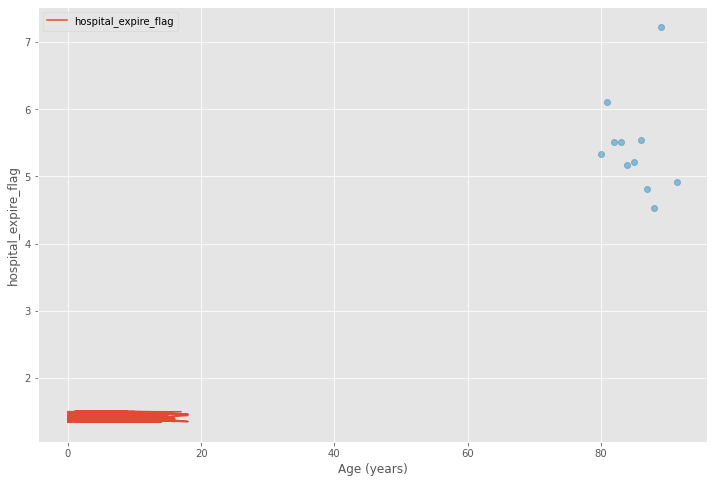

In [127]:
pred = results.predict(df)

plt.plot(df['sofa'], pred, label='hospital_expire_flag')
plt.xlabel('Age (years)')
plt.ylabel('hospital_expire_flag')
plt.legend()

grouped = df.groupby('age')


mean_sofa_by_age = grouped['sofa'].mean()

plt.plot(mean_sofa_by_age, 'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('hospital_expire_flag')



In [125]:
formula = 'death_location_simplified ~ C(vaso_treatment)'
results = smf.ols(formula, data=df).fit()
results.params

Intercept                 1.423509
C(vaso_treatment)[T.1]   -0.019640
dtype: float64

In [126]:
formula = 'death_location_simplified ~ C(vaso_treatment) + age'
results = smf.ols(formula, data=df).fit()
results.params

Intercept                 0.328724
C(vaso_treatment)[T.1]   -0.007431
age                       0.012811
dtype: float64

Text(0, 0.5, 'lactate_min')

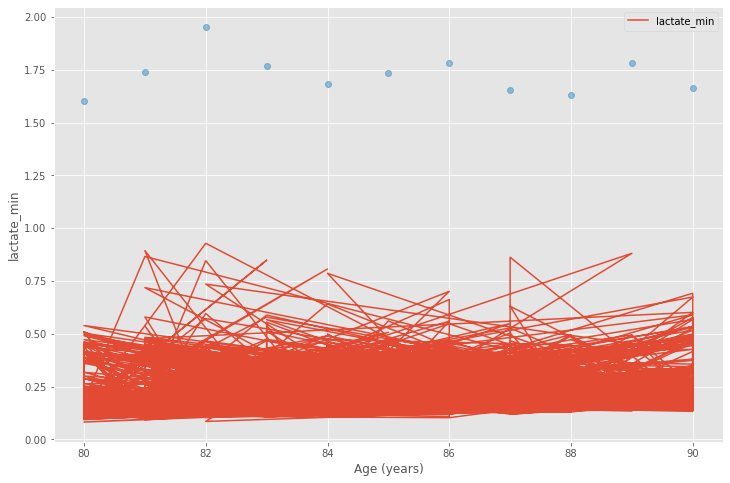

In [188]:
pred = results.predict(df)

plt.plot(df['age'], pred, label='lactate_min')
plt.xlabel('Age (years)')
plt.ylabel('lactate_min)')
plt.legend()

grouped = df.groupby('age')


mean_lactate_min_by_age = grouped['lactate_min'].mean()

plt.plot(mean_lactate_min_by_age, 'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('lactate_min')

In [189]:
formula = 'death_location ~ lactate_min + age + C(vaso_treatment)'
results = smf.logit(formula, data=df).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.496262
         Iterations 6


Intercept                -4.423771
C(vaso_treatment)[T.1]    1.300784
lactate_min               0.310349
age                       0.027919
dtype: float64

Text(0, 0.5, 'lactate_min')

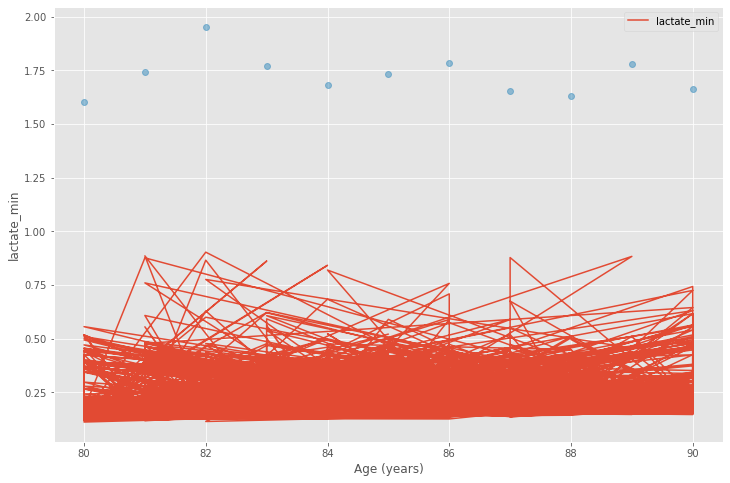

In [190]:
pred = results.predict(df)

plt.plot(df['age'], pred, label='lactate_min')
plt.xlabel('Age (years)')
plt.ylabel('lactate_min)')
plt.legend()

grouped = df.groupby('age')


mean_lactate_min_by_age = grouped['lactate_min'].mean()

plt.plot(mean_lactate_min_by_age, 'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('lactate_min')

In [128]:
from statsmodels.multivariate.manova import MANOVA

maov=MANOVA.from_formula('hospital_expire_flag + C(vaso_treatment)  ~ ethnicity_simplified + sofa + apsiii + oasis + mingcs + elixhauser_vanwalraven', data=df)

print(maov.mv_test())

                                 Multivariate linear model
                                                                                            
--------------------------------------------------------------------------------------------
       Intercept               Value         Num DF   Den DF          F Value         Pr > F
--------------------------------------------------------------------------------------------
          Wilks' lambda              -0.0000 3.0000 4910.0000 -37606588725153224.0000 1.0000
         Pillai's trace               1.0000 3.0000 4910.0000 -37606588725153224.0000 1.0000
 Hotelling-Lawley trace -22977549119238.2227 3.0000 4910.0000 -37606588725153224.0000 1.0000
    Roy's greatest root -22977549119238.2227 3.0000 4910.0000 -37606588725153224.0000 1.0000
--------------------------------------------------------------------------------------------
                                                                                            
-----------